## Real Time Space Mission Data Cleaning And Preprocessing

All space missions from 1957 to August 2022, including details on the location, date, and result of the launch, the company responsible, and the name, price, and status of the rocket used for the mission.

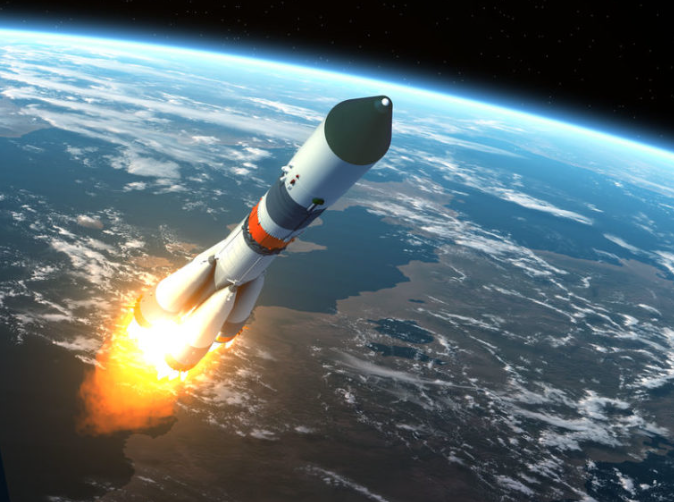

### About the data

**Field-Description:** 

**Company-** Company responsible for the space mission

**Location-** Location of the launch

**Date-** Date of the launch

**Time-** Time of the launch (UTC)

**Rocket-** Name of the rocket used for the mission

**Mission-** Name of the space mission (or missions)

**RocketStatus-** Status of the rocket as of August 2022 (Active or Inactive)

**Price-** Cost of the rocket in millions of US dollars

**MissionStatus-** Status of the mission (Success, Failure, Partial Failure, Prelaunch Failure)

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\wells\\Documents\\rebuilding portfolio projects\\DecoderBot\\Space Mission'

In [3]:
data = pd.read_csv(r"C:\\Users\\wells\\Documents\\rebuilding portfolio projects\\DecoderBot\\Space Mission\\Task 4 -Space_Missions.csv")

In [4]:
data.head()

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1


In [5]:
data.shape

(4626, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4626 non-null   object 
 1   Location       4626 non-null   object 
 2   Year           4626 non-null   int64  
 3   Time           4501 non-null   object 
 4   Rocket         4626 non-null   object 
 5   MissionStatus  4626 non-null   int64  
 6   RocketStatus   4626 non-null   object 
 7   Price          1264 non-null   float64
 8   Mission        4626 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 325.4+ KB


---

Dropping the Price and Time column as they would not be needed in the dashboard metrics.

In [7]:
data.drop(columns = ['Price', 'Time'], inplace = True)

In [8]:
data.shape

(4626, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4626 non-null   object
 1   Location       4626 non-null   object
 2   Year           4626 non-null   int64 
 3   Rocket         4626 non-null   object
 4   MissionStatus  4626 non-null   int64 
 5   RocketStatus   4626 non-null   object
 6   Mission        4626 non-null   object
dtypes: int64(2), object(5)
memory usage: 253.1+ KB


In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(4624, 7)

In [12]:
data.head()

,Company,Location,Year,Rocket,MissionStatus,RocketStatus,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,VLS-1,0,Retired,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,VLS-1,0,Retired,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,VLS-1,0,Retired,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,Redstone Sparta,1,Retired,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,Juno I,1,Retired,Explorer 1


In [13]:
location = "VLS Pad, Alcântara Launch Center, Maranhão"
parts = location.split(',')
print(parts[-2:])

[' Alcântara Launch Center', ' Maranhão']


In [14]:
data.Location.unique()

array(['VLS Pad, Alcântara Launch Center, Maranhão, Brazil',
       'LA-5B, RAAF Woomera Range Complex, Australia',
       'LC-26A, Cape Canaveral AFS, Florida, USA',
       'LC-5, Cape Canaveral AFS, Florida, USA',
       'ELA-1, Guiana Space Centre, French Guiana, France',
       'ELA-2, Guiana Space Centre, French Guiana, France',
       'ELA-3, Guiana Space Centre, French Guiana, France',
       'ELS, Guiana Space Centre, French Guiana, France',
       'ELV-1 (SLV), Guiana Space Centre, French Guiana, France',
       'ELV-1, Guiana Space Centre, French Guiana, France',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'Brigitte, Hammaguir, Algeria, France',
       'Santa Rita 2, San Marco Launch Platform, Kenya',
       'SM Launch Tab, San Marco Launch Platform, Kenya',
       'LP-3B, Pacific Spaceport Complex, Kodiak, Alaska, USA',
       'SLC-46, Cape Canaveral SFS, Florida, USA',
       'Blue Origin Launch Site, West Texas, Texas, USA',
       'Launch Site One, West Te

In [15]:
data[['State','City', 'Country']] = data['Location'].str.split(',', expand = True)[[1, 2, 3]]

In [16]:
data.head()

,Company,Location,Year,Rocket,MissionStatus,RocketStatus,Mission,State,City,Country
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,VLS-1,0,Retired,SCD-2A,Alcântara Launch Center,Maranhão,Brazil
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,VLS-1,0,Retired,SACI-2,Alcântara Launch Center,Maranhão,Brazil
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,VLS-1,0,Retired,"SATEC, UNOSAT",Alcântara Launch Center,Maranhão,Brazil
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,Redstone Sparta,1,Retired,WRESAT,RAAF Woomera Range Complex,Australia,None
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,Juno I,1,Retired,Explorer 1,Cape Canaveral AFS,Florida,USA


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4624 non-null   object
 1   Location       4624 non-null   object
 2   Year           4624 non-null   int64 
 3   Rocket         4624 non-null   object
 4   MissionStatus  4624 non-null   int64 
 5   RocketStatus   4624 non-null   object
 6   Mission        4624 non-null   object
 7   State          4624 non-null   object
 8   City           4598 non-null   object
 9   Country        1786 non-null   object
dtypes: int64(2), object(8)
memory usage: 397.4+ KB


In [18]:
data['City'] = data['City'].fillna(data['State'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4624 non-null   object
 1   Location       4624 non-null   object
 2   Year           4624 non-null   int64 
 3   Rocket         4624 non-null   object
 4   MissionStatus  4624 non-null   int64 
 5   RocketStatus   4624 non-null   object
 6   Mission        4624 non-null   object
 7   State          4624 non-null   object
 8   City           4624 non-null   object
 9   Country        1786 non-null   object
dtypes: int64(2), object(8)
memory usage: 397.4+ KB


In [20]:
data['Country'] = data['Country'].fillna(data['City'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4624 non-null   object
 1   Location       4624 non-null   object
 2   Year           4624 non-null   int64 
 3   Rocket         4624 non-null   object
 4   MissionStatus  4624 non-null   int64 
 5   RocketStatus   4624 non-null   object
 6   Mission        4624 non-null   object
 7   State          4624 non-null   object
 8   City           4624 non-null   object
 9   Country        4624 non-null   object
dtypes: int64(2), object(8)
memory usage: 397.4+ KB


In [22]:
data.head()

,Company,Location,Year,Rocket,MissionStatus,RocketStatus,Mission,State,City,Country
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,VLS-1,0,Retired,SCD-2A,Alcântara Launch Center,Maranhão,Brazil
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,VLS-1,0,Retired,SACI-2,Alcântara Launch Center,Maranhão,Brazil
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,VLS-1,0,Retired,"SATEC, UNOSAT",Alcântara Launch Center,Maranhão,Brazil
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,Redstone Sparta,1,Retired,WRESAT,RAAF Woomera Range Complex,Australia,Australia
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,Juno I,1,Retired,Explorer 1,Cape Canaveral AFS,Florida,USA


In [23]:
# dropping columns that aren't neccesary
data.drop(columns = ['Location', 'State'], inplace = True)

In [24]:
data.head()

,Company,Year,Rocket,MissionStatus,RocketStatus,Mission,City,Country
0,AEB,1997,VLS-1,0,Retired,SCD-2A,Maranhão,Brazil
1,AEB,1999,VLS-1,0,Retired,SACI-2,Maranhão,Brazil
2,AEB,2003,VLS-1,0,Retired,"SATEC, UNOSAT",Maranhão,Brazil
3,AMBA,1967,Redstone Sparta,1,Retired,WRESAT,Australia,Australia
4,AMBA,1958,Juno I,1,Retired,Explorer 1,Florida,USA


In [25]:
data['Location'] = data.City + ', ' + data.Country

In [26]:
data.head()

,Company,Year,Rocket,MissionStatus,RocketStatus,Mission,City,Country,Location
0,AEB,1997,VLS-1,0,Retired,SCD-2A,Maranhão,Brazil,"Maranhão, Brazil"
1,AEB,1999,VLS-1,0,Retired,SACI-2,Maranhão,Brazil,"Maranhão, Brazil"
2,AEB,2003,VLS-1,0,Retired,"SATEC, UNOSAT",Maranhão,Brazil,"Maranhão, Brazil"
3,AMBA,1967,Redstone Sparta,1,Retired,WRESAT,Australia,Australia,"Australia, Australia"
4,AMBA,1958,Juno I,1,Retired,Explorer 1,Florida,USA,"Florida, USA"


In [27]:
data.Location.unique()

array([' Maranhão,  Brazil', ' Australia,  Australia', ' Florida,  USA',
       ' French Guiana,  France', ' Kazakhstan,  Kazakhstan',
       ' Algeria,  France', ' Kenya,  Kenya', ' Kodiak,  Alaska',
       ' Texas,  USA', ' California,  USA', ' China,  China',
       ' Yellow Sea,  Yellow Sea', ' Virginia,  USA', ' Russia,  Russia',
       ' New Mexico,  New Mexico', ' Israel,  Israel',
       ' Shahrud Missile Test Site,  Shahrud Missile Test Site',
       ' Iran,  Iran', ' Japan,  Japan', ' India,  India',
       ' South Korea,  South Korea', ' North Korea,  North Korea',
       ' Alaska,  USA', ' Gran Canaria,  Gran Canaria',
       ' Marshall Islands,  USA', ' New Zealand,  New Zealand',
       ' Pacific Missile Range Facility,  Pacific Missile Range Facility',
       ' Pacific Ocean,  Pacific Ocean', ' Barents Sea,  Barents Sea',
       ' New Mexico,  USA'], dtype=object)

In [28]:
state = {
    ' Maranhão,  Brazil': -2.5283,
    ' Australia,  Australia': -26.853388,
    ' Florida,  USA': 27.994402,
    ' French Guiana,  France': 3.9332,
    ' Kazakhstan,  Kazakhstan': 48.0053,
    ' Algeria,  France': 46.7111,
    ' Kenya,  Kenya': 0.1769,
    ' Kodiak,  Alaska': 57.4667,
    ' Texas,  USA': 31.0000,
    ' California,  USA': 36.778259,
    ' China,  China': 39.9890,
    ' Yellow Sea,  Yellow Sea': 35.0000,
    ' Virginia,  USA': 37.926868,
    ' Russia,  Russia': 60.0000,
    ' New Mexico,  New Mexico': 34.307144,
    ' Israel,  Israel': 31.4117,
    ' Shahrud Missile Test Site,  Shahrud Missile Test Site': 36.4182,
    ' Iran,  Iran': 32.4207,
    ' Japan,  Japan': 36.0000,
    ' India,  India': 21.0000,
    ' South Korea,  South Korea': 37.532600,
    ' North Korea,  North Korea': 40.3245,
    ' Alaska,  USA': 66.160507,
    ' Gran Canaria,  Gran Canaria': 28.1000,
    ' Marshall Islands,  USA': 11.6040,
    ' New Zealand,  New Zealand': -41.2833,
    ' Pacific Missile Range Facility,  Pacific Missile Range Facility': 22.0203,
    ' Pacific Ocean,  Pacific Ocean': 0.0000,
    ' Barents Sea,  Barents Sea': 74.988396,
    ' New Mexico,  USA': 34.307144
}

In [29]:
data['Latitude'] = data['Location'].map(state)

In [30]:
data.head()

,Company,Year,Rocket,MissionStatus,RocketStatus,Mission,City,Country,Location,Latitude
0,AEB,1997,VLS-1,0,Retired,SCD-2A,Maranhão,Brazil,"Maranhão, Brazil",-2.528300
1,AEB,1999,VLS-1,0,Retired,SACI-2,Maranhão,Brazil,"Maranhão, Brazil",-2.528300
2,AEB,2003,VLS-1,0,Retired,"SATEC, UNOSAT",Maranhão,Brazil,"Maranhão, Brazil",-2.528300
3,AMBA,1967,Redstone Sparta,1,Retired,WRESAT,Australia,Australia,"Australia, Australia",-26.853388
4,AMBA,1958,Juno I,1,Retired,Explorer 1,Florida,USA,"Florida, USA",27.994402


In [31]:
state_long = {
    ' Maranhão,  Brazil': 133.275154,
    ' Australia,  Australia': -44.3044,
    ' Florida,  USA': -81.760254,
    ' French Guiana,  France': -53.0876,
    ' Kazakhstan,  Kazakhstan': 66.9045,
    ' Algeria,  France': 1.7191,
    ' Kenya,  Kenya': 37.9083,
    ' Kodiak,  Alaska': -153.43333,
    ' Texas,  USA': -100.0000,
    ' California,  USA': -119.417931,
    ' China,  China': 116.3207,
    ' Yellow Sea,  Yellow Sea': 123.0000,
    ' Virginia,  USA': -78.024902,
    ' Russia,  Russia': 100.0000,
    ' New Mexico,  New Mexico': -106.018066,
    ' Israel,  Israel': 35.0818,
    ' Shahrud Missile Test Site,  Shahrud Missile Test Site': 54.9763,
    ' Iran,  Iran': 53.6830,
    ' Japan,  Japan': 138.0000,
    ' India,  India': 78.0000,
    ' South Korea,  South Korea': 127.024612,
    ' North Korea,  North Korea': 127.4310,
    ' Alaska,  USA': -153.369141,
    ' Gran Canaria,  Gran Canaria': -15.4540,
    ' Marshall Islands,  USA': 165.3133,
    ' New Zealand,  New Zealand': 174.4499982,
    ' Pacific Missile Range Facility,  Pacific Missile Range Facility': -159.7843,
    ' Pacific Ocean,  Pacific Ocean': -160.0000,
    ' Barents Sea,  Barents Sea': 37.106369,
    ' New Mexico,  USA': -106.018066
}

In [32]:
data['Longitude'] = data['Location'].map(state_long)

In [33]:
data.head()

,Company,Year,Rocket,MissionStatus,RocketStatus,Mission,City,Country,Location,Latitude,Longitude
0,AEB,1997,VLS-1,0,Retired,SCD-2A,Maranhão,Brazil,"Maranhão, Brazil",-2.528300,133.275154
1,AEB,1999,VLS-1,0,Retired,SACI-2,Maranhão,Brazil,"Maranhão, Brazil",-2.528300,133.275154
2,AEB,2003,VLS-1,0,Retired,"SATEC, UNOSAT",Maranhão,Brazil,"Maranhão, Brazil",-2.528300,133.275154
3,AMBA,1967,Redstone Sparta,1,Retired,WRESAT,Australia,Australia,"Australia, Australia",-26.853388,-44.304400
4,AMBA,1958,Juno I,1,Retired,Explorer 1,Florida,USA,"Florida, USA",27.994402,-81.760254


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4624 non-null   object 
 1   Year           4624 non-null   int64  
 2   Rocket         4624 non-null   object 
 3   MissionStatus  4624 non-null   int64  
 4   RocketStatus   4624 non-null   object 
 5   Mission        4624 non-null   object 
 6   City           4624 non-null   object 
 7   Country        4624 non-null   object 
 8   Location       4624 non-null   object 
 9   Latitude       4624 non-null   float64
 10  Longitude      4624 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 433.5+ KB


In [38]:
data.groupby('Country')[['MissionStatus']].count()

,MissionStatus
Country,
Alaska,5
Australia,6
Barents Sea,3
Brazil,3
China,364
France,318
Gran Canaria,2
India,82
Iran,15


In [35]:
# exatracting the data for dashbaord building
data.to_csv('space.csv', index = False)